##  1. Import libraries required for EDA

In [1]:
# libraries to read the csv and inspeact the dataframe created from csv
import pandas as pd
import numpy as np

#libraries for EDA - Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## 2. Reading the CSV and understanding the data

In [3]:
#Read the CSV

leads = pd.read_csv('Leads.csv')

#maintaining a copy of the dataframe, so that we can do further data handling whlist we have a copy
leads_orig = leads

In [4]:
#let us see the top 5 rows

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#Shape of the leads dataframe
dimension = leads.shape
print('Number of rows in Leads dataframe are ', dimension[0])
print('Number of columns in Leads dataframe are ', dimension[1])

Number of rows in Leads dataframe are  9240
Number of columns in Leads dataframe are  37


In [6]:
#Lets see the further details about columns of this dataframe

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#lets see how the numerlical columns are

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


######  Dropping the duplicates

In [8]:
#Lets first drop duplicate columns if any before analysing null value columns

dimension = leads.shape
print('Number of rows in Leads dataframe before dropping duplicate rows are ', dimension[0])
print('Number of columns in Leads dataframe before dropping duplicate rows are ', dimension[1])


leads.drop_duplicates(subset=None, inplace=True)

print()
print()
dimension = leads.shape
print('Number of rows in Leads dataframe after dropping duplicate rows are ', dimension[0])
print('Number of columns in Leads dataframe after dropping duplicate rows are ', dimension[1])

#they are same as seen below


Number of rows in Leads dataframe before dropping duplicate rows are  9240
Number of columns in Leads dataframe before dropping duplicate rows are  37


Number of rows in Leads dataframe after dropping duplicate rows are  9240
Number of columns in Leads dataframe after dropping duplicate rows are  37


###### Before doing any further analysis lets drop prospect Id and Lead number as they are unique identifiers for a row and
###### add no weightage or insights to our analysis

In [9]:
leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)


## 3. Dropping columns which have null values >= 40%

### Look for null columns and drop those which have values >= 40%

In [10]:
#lets analyze how many columns have null values and to what %

leads_null_columns = (leads.isnull().sum()/len(leads.index))*100
leads_null_columns.sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [11]:
#Inference from above

print('Number of null columns having null % between 20 and 30 are ', len(leads_null_columns[(leads_null_columns >= 20) & (leads_null_columns <= 30)]))
print('Number of null columns having null % between 30 and 40 are ', len(leads_null_columns[(leads_null_columns >= 30) & (leads_null_columns < 40)]))
print('Number of null columns having null >= 40% are ', len(leads_null_columns[(leads_null_columns >= 40)]))

#There are a total of 5 columns with null values greater than 45%

Number of null columns having null % between 20 and 30 are  5
Number of null columns having null % between 30 and 40 are  1
Number of null columns having null >= 40% are  5


## Impute columns that have 'Select' 

####  Before dropping null columns having >= 40 % null values, lets first analyze the "Select" value for categorical variables and how much they constitute to take care of the point mentioned in problem statement

In [12]:
#Getting categorical clumns which have "Select" as a value.

categorical_column_with_select_value=[]
for column in leads.columns:
    if len(leads[column].isin(['Select']).unique())>1:   
        categorical_column_with_select_value.append(column)
print(categorical_column_with_select_value)



['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


###### It is clear that for above columns leads have left the option as "Select" without choosing any value.

In [13]:
# 1. Lets analyze what percentage of the above columns have Select as value
# 2. Impute select with Nan as we do not know what the actual value for the user is if 'Select' % is high


for categorical_column in categorical_column_with_select_value:
    print('"',categorical_column, '" column has', leads[[categorical_column]].value_counts(normalize=True)['Select']*100, 'Select values')




" Specialization " column has 24.891053576006154 Select values
" How did you hear about X Education " column has 71.70482013365562 Select values
" Lead Profile " column has 63.481855764813965 Select values
" City " column has 28.759590792838875 Select values


###### Impute select values with NaN and then drop columns having null values >= 45%

In [14]:
#Lets impute "Select" values with NaN

leads[categorical_column_with_select_value] = leads[categorical_column_with_select_value].replace('Select', np.nan)


In [15]:
#Now lets analyze null percentage again and drop columns having > 45% null values

leads_null_columns_after_select_imputation = (leads.isnull().sum()/len(leads.index))*100
print('Number of null columns having null % between 20 and 30 are ', len(leads_null_columns_after_select_imputation[(leads_null_columns_after_select_imputation >= 20) & (leads_null_columns_after_select_imputation <= 30)]))
print('Number of null columns having null % between 30 and 40 are ', len(leads_null_columns_after_select_imputation[(leads_null_columns_after_select_imputation >= 30) & (leads_null_columns_after_select_imputation < 40)]))
print('Number of null columns having null >= 40% are ', len(leads_null_columns_after_select_imputation[(leads_null_columns_after_select_imputation >= 40)]))


Number of null columns having null % between 20 and 30 are  3
Number of null columns having null % between 30 and 40 are  3
Number of null columns having null >= 40% are  7


###### We clearly see that after imputing Select with NaN number of columns having null values >= 40 % increased from 5 to 7. Lets drop these columns

In [17]:
#Columns having gte 40% null values

columns_with_gte_40_pct_null_values = leads_null_columns_after_select_imputation[(leads_null_columns_after_select_imputation >= 40)]
columns_with_gte_40_pct_null_values

How did you hear about X Education    78.463203
Lead Quality                          51.590909
Lead Profile                          74.188312
Asymmetrique Activity Index           45.649351
Asymmetrique Profile Index            45.649351
Asymmetrique Activity Score           45.649351
Asymmetrique Profile Score            45.649351
dtype: float64

In [18]:
leads.drop(columns_with_gte_40_pct_null_values.keys(), axis=1, inplace=True)
((leads.isnull().sum()/len(leads.index))*100).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Lead Origin                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.0000

## 3. Missing(null) value treatment and Dropping columns 

### 3.1 Numerical Columns - Missing value tratement and dropping of columns that are not useful for analysis

In [19]:
#Numeric columns list

numeric_columns = leads.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [21]:
leads[numeric_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Converted                    9240 non-null   int64  
 1   TotalVisits                  9103 non-null   float64
 2   Total Time Spent on Website  9240 non-null   int64  
 3   Page Views Per Visit         9103 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 360.9 KB


######  It is clear that Converted and Total Time Spent on Website have 0 null values.
###### TotalVisits and  Page Views Per Visit  have total 9240-9103 = 137 missing values that accounts to just  1.482% missing values so we wil  perform only imputation for these columns 
###### Before replacing missing values let us analyze the spread of numerical columns , see if it has outliers  and then decide on what to use for missing values -> mean or median.

In [22]:
#Converted is our target column and hence will be exempt from EDA. However, we will just do a sanity check that unique values are
# only 0 and 1.
leads['Converted'].unique()

array([0, 1], dtype=int64)

###### Boxplot for numerical columns

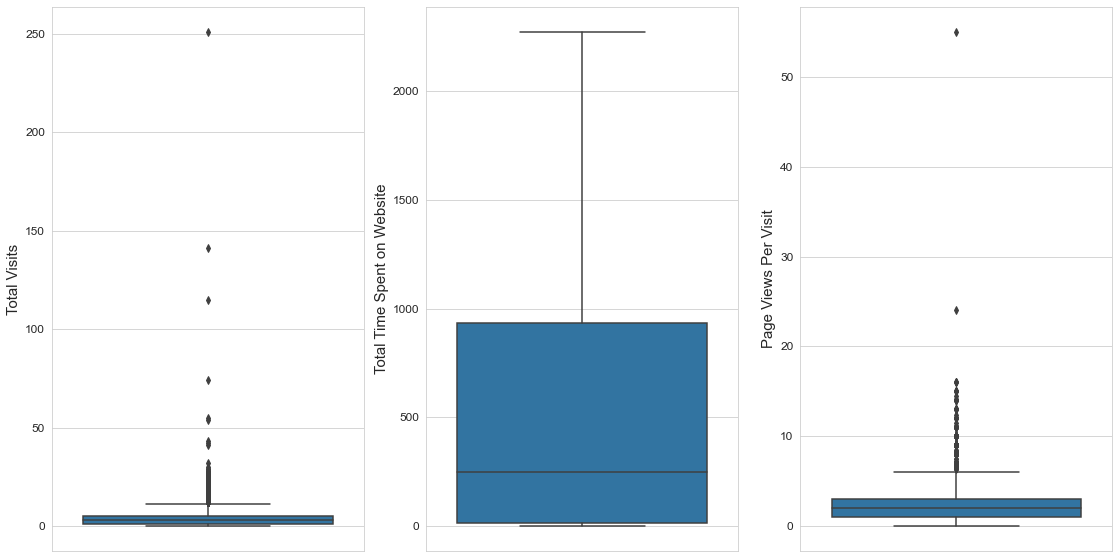

In [23]:
# Build boxplot of all numerical variables except Target
# Build boxplot of all numerical variables 

sns.set_style("whitegrid")

plt.figure(figsize=(19, 10))
plt.subplot(1,3,1)
tv = sns.boxplot(y = 'TotalVisits', data = leads)
tv.set_ylabel("Total Visits",fontsize=15)
tv.tick_params(labelsize=12)
plt.subplot(1,3,2)
tts = sns.boxplot(y = 'Total Time Spent on Website', data = leads)
tts.set_ylabel("Total Time Spent on Website",fontsize=15)
tts.tick_params(labelsize=12)
plt.subplot(1,3,3)
pvpv = sns.boxplot(y = 'Page Views Per Visit', data = leads)
pvpv.set_ylabel("Page Views Per Visit",fontsize=15)
pvpv.tick_params(labelsize=12)
plt.show()

######  lets analyze the percentiles

In [24]:
#Checking the detailed percentile values
leads.describe(percentiles=[0.05,.10,.25,.50,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000


###### From above we can see that there is a gradual increase in values from 95% to 99%, but from 99% to max, the increase is huge.



In [ ]:
print("Total number of rows above 95 percentile for TotalVisits column:",len(leads[leads['TotalVisits'] >= leads['TotalVisits'].quantile(0.95)]))
print("Total number of rows above 95 percentile for Page Views Per Visit column:",len(leads[leads['Page Views Per Visit'] >= leads['Page Views Per Visit'].quantile(0.95)]))

In [ ]:
print("Total number of rows above 99 percentile for TotalVisits column:",len(leads[leads['TotalVisits'] >= leads['TotalVisits'].quantile(0.99)]))
print("Total number of rows above 99 percentile for Page Views Per Visit column:",len(leads[leads['Page Views Per Visit'] >= leads['Page Views Per Visit'].quantile(0.99)]))

In [ ]:
#Capping the data at 95% percentile since the number of rows at 95% is  significantly less
leads.loc[leads['TotalVisits'] >= leads['TotalVisits'].quantile(0.95), 'TotalVisits'] = leads['TotalVisits'].quantile(0.95) # outlier capping
leads.loc[leads['Page Views Per Visit'] >= leads['Page Views Per Visit'].quantile(0.95), 'Page Views Per Visit'] = leads['Page Views Per Visit'].quantile(0.95) # outlier capping

###### We will replace null values in  TotalVisits and Page Views Per Visit  with their median values as there are outliers as can be seen in percentiles table and box plot

In [25]:
#Also since now we have a better understadning of numerical data, since there are outliers and we are only capping but not deleting
#them we wil replace null values for TotalVisits and Page Views Per Visit  with median

leads['TotalVisits'].fillna(leads['TotalVisits'].median(), inplace=True)
print('number of null values in TotalVisits columns', leads['TotalVisits'].isnull().sum())

leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median(), inplace=True)
print('number of null values in Page Views Per Visit columns', leads['Page Views Per Visit'].isnull().sum())

number of null values in TotalVisits columns 0
number of null values in Page Views Per Visit columns 0


In [ ]:
plt.figure(figsize=(19, 10))
plt.subplot(1,3,1)
tv = sns.boxplot(y = 'TotalVisits', data = leads)
tv.set_ylabel("Total Visits",fontsize=15)
tv.tick_params(labelsize=12)
plt.subplot(1,3,2)
tts = sns.boxplot(y = 'Total Time Spent on Website', data = leads)
tts.set_ylabel("Total Time Spent on Website",fontsize=15)
tts.tick_params(labelsize=12)
plt.subplot(1,3,3)
pvpv = sns.boxplot(y = 'Page Views Per Visit', data = leads)
pvpv.set_ylabel("Page Views Per Visit",fontsize=15)
pvpv.tick_params(labelsize=12)
plt.show()

In [26]:
#Now lets again check for null values.

leads[numeric_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Converted                    9240 non-null   int64  
 1   TotalVisits                  9240 non-null   float64
 2   Total Time Spent on Website  9240 non-null   int64  
 3   Page Views Per Visit         9240 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 360.9 KB


###### From above boxplots, We see that null values are handled.

###### From above we can conclude that all null values are handled for numeric columns

### 3.2 Categorical  Columns - Null value tratement and dropping of columns that are not useful for analysis

#####  Lets drop categorical columns that have only 1 value because they will result in a skewed analysis if not dropped and as well it will reduce the number of columns we have to analyze further

In [27]:
categorical_columns = leads.select_dtypes(include=['object']).columns.tolist() # Getting all categorical columns
single_category_columns = [] # this is a list which will have catgeorical columns that have only 1 category.
for column in categorical_columns:
    if(len(leads[column].unique()) == 1):
        single_category_columns.append(column)

print('Number of single category columns are :', len(single_category_columns))
print()
print('Single category columns are :', single_category_columns) 
print()
dimension = leads.shape
print('Number of columns in Leads dataframe before dropping single category columns are ', dimension[1])
print()
leads.drop(single_category_columns,1,inplace = True)   
dimension = leads.shape
print('Number of columns in Leads dataframe after dropping single category columns are ', dimension[1])

Number of single category columns are : 5

Single category columns are : ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']

Number of columns in Leads dataframe before dropping single category columns are  28

Number of columns in Leads dataframe after dropping single category columns are  23


#####  Lets drop categorical columns that have >= 90% values that belong to 1 category because they will result in a skewed analysis if not dropped and as well it will reduce the number of columns we have to analyze further

In [28]:
categorical_columns = leads.select_dtypes(include=['object']).columns.tolist()
columns_having_1_category_gte_90_pct = []
for column in categorical_columns:
    if((leads[column].value_counts(dropna=False,normalize=True)*100)[0] >= 90):
        columns_having_1_category_gte_90_pct.append(column)
        
print('Number of  columns having >= 90% values in one category are :', len(columns_having_1_category_gte_90_pct))
print()
print('columns having >= 90% values in one category are :', columns_having_1_category_gte_90_pct) 
print()
dimension = leads.shape
print('Number of columns in Leads dataframe before dropping columns having >= 90% values in one categor are ', dimension[1])
print()
leads.drop(columns_having_1_category_gte_90_pct,1,inplace = True)   
dimension = leads.shape
print('Number of columns in Leads dataframe after dropping columns having >= 90% values in one categor columns are ', dimension[1])

Number of  columns having >= 90% values in one category are : 8

columns having >= 90% values in one category are : ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations']

Number of columns in Leads dataframe before dropping columns having >= 90% values in one categor are  23

Number of columns in Leads dataframe after dropping columns having >= 90% values in one categor columns are  15


######  Replace null values with mode for categorical columns

In [30]:
categorical_columns = leads.select_dtypes(include=['object']).columns.tolist()
null_columns = []
for column in categorical_columns:
    if(((leads[column].isnull().sum() / leads.shape[0]) * 100) > 0):
        null_columns.append(column)
null_columns

['Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'City']

In [31]:
for column in null_columns:
    leads[column].fillna(leads[column].mode()[0], inplace=True)
    
#Verify there are no null values
categorical_columns_sorted = ((leads[categorical_columns].isnull().sum() / leads.shape[0]) * 100).sort_values(ascending=False)
categorical_columns_sorted

Lead Origin                                      0.0
Lead Source                                      0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Tags                                             0.0
City                                             0.0
A free copy of Mastering The Interview           0.0
Last Notable Activity                            0.0
dtype: float64

######  From above we can see that null percentages are less than 40%, so we will not drop these columns that have null values but will impute them.

###### Lets analyze these columns individually take to make a sound decision on how to impute null values and which columns can be dropped

In [ ]:
#lets check the shape again
dimension = leads.shape
print('Number of rows in Leads dataframe are ', dimension[0])
print('Number of columns in Leads dataframe are ', dimension[1])


###### We have total 15 columns and 9240 rows.

###### Lets rename lengthy column names to meaningful short names

In [ ]:
leads.rename(columns={'What is your current occupation': 'Occupation', 
                     'A free copy of Mastering The Interview': 'Free Interview Study Copy'                   
                    },inplace = True)

###### Thus we have reduced the number of columns to 13 and also have imputed such that there are no null values. Hence can proceed to check data imblance and univariate and bivariate analysis

In [ ]:
leads.select_dtypes(include=['object']).columns.tolist()

## 4. Checking for Data Imblanace

In [ ]:
data_imbalance = (leads['Converted'].value_counts()/leads.shape[0])*100
data_imbalance

In [ ]:
plt.figure(figsize=[20,6])
plt.style.use('fivethirtyeight')
plt.pie(leads['Converted'].value_counts(),autopct='%1.0f%%',labels=['No','Yes'],                                                explode=(0,0.05),colors = ['Orange','Pink'])
plt.title('"Converted" Variable data imbalance')
plt.legend()
plt.show()

### 4.1 Univariate Categorical Analysis

In [ ]:
categorical_columns = leads.select_dtypes(exclude=['number']).columns.tolist()
print('Number of categorical columns ara ', len(categorical_columns))
categorical_columns

######  Dataset has the above categorical columns

#### Below is a common fucntion to plot categorical variable

In [ ]:
def plot_cc(df,columnName,title,rotation) :
    
    sns.despine 
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    
    perc_defaulted = df[[columnName, 'Converted']].groupby([columnName],as_index=False).mean()
    perc_defaulted["Converted"] = perc_defaulted["Converted"]*100
    perc_defaulted.sort_values(by='Converted', ascending=False, inplace=True)
    
    ax1= sns.countplot(x = columnName, data=df,hue='Converted',order=df[columnName].value_counts().index)
    ax1.set_title(f'{title} count', fontsize = 15, weight='bold')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')
    ax1.set_ylabel('Count', fontsize=15,weight='bold')
    ax1.set_xlabel(columnName, fontsize=15,weight='bold')
    ax1.legend(['Non Converted','Converted'],loc = "upper right")
     
    plt.subplot(1,2,2)
    ax2=sns.barplot(data = df, x = columnName, y = 'Converted',order = perc_defaulted[columnName],ci=None)
    plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
    ax2.set_title(f'Converted % for {title}', fontsize = 15,weight='bold')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha='right')
    ax2.set_xlabel(columnName, fontsize=15,weight='bold')
    ax2.set_ylabel('Converted percentage', fontsize=15,weight='bold')

    ax1.tick_params(axis='both', labelsize=15)
    ax2.tick_params(axis='both', labelsize=15)
    
    
    bars = ax1.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]
    
    for left, right in zip(left_bars, right_bars):
            height_l = left.get_height()
            height_r = right.get_height()
            total = height_l + height_r
            
            
            ax1.annotate('{0}'.format(height_l), (left.get_x() + left.get_width()/2., height_l),
                    ha='center', va='bottom',
                    color= 'black',rotation=rotation)
            ax1.annotate('{0}'.format(height_r), (right.get_x() + left.get_width()/2., height_r),
                    ha='center', va='bottom',
                    color= 'black',rotation=rotation)
            
    bars_2 = ax2.patches
    half2 = int(len(bars_2)/2)
    left_bars = bars_2[:half2]
    right_bars = bars_2[half2:]
    
    for left, right in zip(left_bars, right_bars):
            height_l = left.get_height()
            height_r = right.get_height()
            total = height_l + height_r

            #ax2.text(left.get_x() + left.get_width()/2., height_l,'{0:.0%}'.format(height_l), ha="center")
            #ax2.text(right.get_x() + right.get_width()/2., height_r, '{0:.0%}'.format(height_r), ha="center")
            
            ax2.annotate('{0:.0%}'.format(height_l), (left.get_x() + left.get_width()/2., height_l),
                    ha='center', va='bottom',
                    color= 'black',rotation=rotation)
            ax2.annotate('{0:.0%}'.format(height_r), (right.get_x() + left.get_width()/2., height_r),
                    ha='center', va='bottom',
                    color= 'black',rotation=rotation)
            
            
            
    
    
    plt.tight_layout()
    plt.show()

###### Lead Origin

In [ ]:
plot_cc(leads,'Lead Origin','Lead Origin',0)

######  Inferences from 'Lead Origin' graphs
**1. Quick Add Form has the least count but it got converted 100%**

**2. Lead Add Form has only 718 entries but it has the second highest conversion rate of about 92%**

**3. Landing Page submission has the highest number but it is third in conversion rate about 36%**

**4. API design is second highest number of lead origins but its conversion rate is only aout 31%**

######  Insights

**1. More leads should be generated from quick add form and lead add form as lead origins. These should be heavily used**

**2. But since number of lead origina are highest in Landing page submission and API, lead conversion from these origins should be improved**


###### Lead Source

In [ ]:
plot_cc(leads,'Lead Source','Lead Source',60)

######  Inferences from 'Lead Source' graphs
**1. NC_EDM, WeLearn, LiveChat have 100% conversion rate though they are the least in number.**


**2. Google has the highest count and a conversion rate of about 40%**


**3. Direct Traffic, Olark Chat, Organic Search are higher in number of all the sources but their conversion rate is 32%,26% 
and 36% respectively**


**4. Welingak website accounts to only 142 leads but their conversion is 99%**


**5. There are total 534 references and the conversion rate is 92%**




######  Insights

**1. Existing or past students/customers should be actively involved to give reference as references has a high conversion rate of about 92%**

**2. Just 142 leads are from Welingak wesbite and they have 99% conversion rate - so definitely this source should be given weightage**




###### Last Activity

In [ ]:
plot_cc(leads,'Last Activity','Last Activity',5)

######  Inferences from 'Last Activity' graphs

**1. Email opened is highest in count and its convertion rate is about 38%**


**2. SMS sent issecond  highest in count and its convertion rate is about 63%**


**3. 'Approached Upfront' has just 9 in count but has 100% convertion rate**


**4. Though Email marked spam has 100% convertion the count is just 2 and we cannot make any inference from this for logical reasons**


**5. All other activities except SMS sent and Email opened do not have much count and hence can be clubbed as one category**




######  Insights

**1. Email opened and SMS sent have a significant convertion rate in comparison to others**



In [ ]:
plot_cc(leads,'Specialization','Specialization',36)

###### **Inferences and Insights from 'Specialization' columns**

**1. People whose specialization is 'Not Specified' have the least convertion rate**

**2. Only 159 leads have Healthcare management as specialization but they have the highest convertion rate**

**3. Banking, Insurance and Investment has 338 leads and its convertion rate is about 49%**

**4. Management specializations have higher convertion rates from above graphs -  Marketing Management(838 leads, 49% convertion), Operations Management(538 leads, 47% converrtion), Human Resources Management(848 leads, 46% convertion)**

**5.  Thus, we can say company can reach out to leads from Banking and Management specializations as they have very high convertion ratios**

In [ ]:
plot_cc(leads,'Occupation','Occupation',0)

###### **Inferences and Insights from 'Occupation' column**

**1. Housewife are the least in count of leads but they have 100% (highest) convertion rate**

**2. Working professional is the third highest count in leads but second highest in convertion rate**

**3. Unemployed count is highest but their convertion rate is about 44%, so may be a discount after proper verification of unemployed status might increase lead convertion rate**

**4. People who do not specify their occupation have the least number of converts so better to concentrate more on leads that specify an occupation type and on those occupations that have high convertion rates like housewife and working professionals**

In [ ]:
plot_cc(leads,'Free Interview Study Copy','Free Interview Study Copy',0)

###### **Inferences and Insights from 'Free Interview Study Copy' column**

**1. Free interview study copy has no much variation between number of leads that got converted for both its categories. So this will not help in the analysis and can be dropped'**

In [ ]:
#drop the 'Free Interview Study Copy' column
leads.drop('Free Interview Study Copy', 1, inplace = True)

### 4.2 Univariate Numerical Analysis


###### Will do univariate analysis for numeric columns based on 'Converted' variable

In [ ]:
print('numeric columns to be analyzed are -> ', numeric_columns)

In [ ]:
# Sort the dataframe by target
not_converted = leads.loc[leads['Converted'] == 0]
converted = leads.loc[leads['Converted'] == 1]


def plot_un(columnName,title):
    plt.figure(figsize=(12,5))
    plt.title(title)
    sns.distplot(not_converted[columnName], hist = False, label = 'Not Converted',color='Red')
    sns.distplot(converted[columnName], hist = False, label = 'Converted',color='Green')
    plt.legend()
    plt.show()

In [ ]:
plot_un('TotalVisits',' "Total Visits" Distribution')

In [ ]:
plot_un('Total Time Spent on Website',' "Total Time Spent on Website" Distribution')

In [ ]:
plot_un('Page Views Per Visit',' "Page Views Per Visit" Distribution')

######  Inferences from above graphs

**1. There is no clear pattern for any of the three numerical columns with target variable which is 'Converted' however for 'Total Visists' and 'Page View per visists' the distribution looks similar for converted and not converted leads**

### 4.2 Bivariate Categorical Analysis

In [ ]:
categorical_columns = leads.select_dtypes(include=['object']).columns.tolist()
categorical_columns

In [ ]:
plt.figure(figsize=(15,25))
plt.subplots_adjust(wspace=.2,hspace=1.2 )
categorical_columns = leads.select_dtypes(include=['object']).columns.tolist()
for i in enumerate(categorical_columns):
    plt.subplot(4,2, i[0]+1)
    ax1 = sns.countplot(x = i[1],hue = 'Converted', data = leads)
    plt.xticks(rotation=90)
    bars = ax1.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]
    for left, right in zip(left_bars, right_bars):
            height_l = left.get_height()
            height_r = right.get_height()
            total = height_l + height_r
        
plt.show()